<a href="https://colab.research.google.com/github/Shibu778/MyNotebooks/blob/master/Amplification_distribution_area_and_lyapunov_exponent_analysis_for_sleep_apnea_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intitial Setup and Data Reading and some utility Function


First Mount the drive


In [1]:
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
cd ../../

/content/drive/My Drive


In [ ]:
pwd

'/content/drive/My Drive/Sleep data/Rawat Sumit - 06.08.2019'

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import cKDTree as KDTree
from nolitsa.nolitsa import lyapunov, utils, delay, dimension
from sklearn import linear_model

In [3]:
# Utility Functions
def txt_to_arr(filepath_in):
    '''
    Function : Takes the relative file path and read the *.txt file mentioned in the path and
    gives an numpy array as output.
    Input : filepath
    Output : Numpy array containing the single column signal inside the txt file
    Use the following file format
    filepath = '/content/drive/My Drive/Sleep data/Amit Agrahari/C3 - 14.04.2014.txt'
    txt_to_mat(filepath)
    '''
    df = pd.read_csv(filepath_in,header=None,encoding= 'unicode_escape')
    df = df[6:]
    arr = np.squeeze(df.to_numpy(),axis = 1)
    arr = arr.astype(float)
    print("Length of data : ", len(arr))
    return arr

def euclidean_distance(x,y):
  return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2+(x[2]-y[2])**2)

def magnitude_of_vector(x):
  return np.sqrt(x[0]**2+x[1]**2+x[2]**2)

def best_fit_slope(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs**2)))
    return m

def best_regr_slope(xs, ys):
  regr = linear_model.LinearRegression()
  regr.fit(xs, ys)
  return regr.coef_

# Main Functions

In [7]:
# Main Functions
def find_le_area(x, dim = [6]):
  r = delay.acorr(x, maxtau=50)
  tau = np.argmax(r < 1.0 / np.e)
  data1 = np.asarray([utils.reconstruct(x, dim=d, tau=tau) for d in dim], dtype = float)
  data1 = np.squeeze(data1)
  # Plotting the first three state
  x1 = data1[:,0]
  x2 = data1[:,1]
  x3 = data1[:,2]
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x1,x2,x3, zdir='z',  c='b', marker='o')
  #
  tree = KDTree(data1)
  j = 1 # index of the point whose nearest neighbor is taken into study
  for i in range(2, 23):
    dist, index = tree.query(data1[j], k = i, p =2) # p=2 for euclidean distance

  # So point with index 1 and 4477 can be taken as the two point in closest trajectories 
  #(Considering the Theiler wondow; as 4477 is greater than the theiler window)
  # Finding the amplification upto next 1000 points in each
  A = np.array([],dtype = float)
  d0 = dist[1]
  A = np.append(A,d0)
  for i in range(1,3000):
    d1 = np.asarray(euclidean_distance(data1[j+i],data1[index[1]+i]), dtype = float)
    A = np.append(A,d1)

  # Plotting the histogram
  n, bins, patches = plt.hist(x=A, bins=100, color='#0504aa',
                              alpha=0.7, rwidth=0.85)
  area = sum(np.diff(bins)*n)
  # Lyapunov exponent
  le = lyapunov.mle(data1, maxnum = 1000) # Average divergence
  le_real = best_fit_slope(np.arange(500)/500,le/max(le)) # Lyapunov exponent

  return le_real, area

def find_area_with_plot(x, dim = [6]):
  r = delay.acorr(x, maxtau=50)
  tau = np.argmax(r < 1.0 / np.e)
  data1 = np.asarray([utils.reconstruct(x, dim=d, tau=tau) for d in dim], dtype = float)
  data1 = np.squeeze(data1)
  # Plotting the first three state
  x1 = data1[:,0]
  x2 = data1[:,1]
  x3 = data1[:,2]
  fig = plt.figure(1)
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x1,x2,x3, zdir='z',  c='b', marker='o')
  #
  tree = KDTree(data1)
  j = 1 # index of the point whose nearest neighbor is taken into study
  for i in range(2, 23):
    dist, index = tree.query(data1[j], k = i, p =2) # p=2 for euclidean distance

  # So point with index 1 and 4477 can be taken as the two point in closest trajectories 
  #(Considering the Theiler wondow; as 4477 is greater than the theiler window)
  # Finding the amplification upto next 1000 points in each
  A = np.array([],dtype = float)
  d0 = dist[1]
  A = np.append(A,d0)
  for i in range(1,2000):
    d1 = np.asarray(euclidean_distance(data1[j+i],data1[index[1]+i]), dtype = float)
    A = np.append(A,d1)

  # Plotting the histogram
  plt.figure(2)
  n, bins, patches = plt.hist(x=A, bins=100, color='#0504aa',
                              alpha=0.7, rwidth=0.85)
  area = sum(np.diff(bins)*n)
  return area

def find_area(x,x1, dim = [6], tau = 10):
  #r = delay.acorr(x, maxtau=50)
  #tau = np.argmax(r < 1.0 / np.e)
  data1 = np.asarray([utils.reconstruct(x, dim=d, tau=tau) for d in dim], dtype = float)
  data1 = np.squeeze(data1)
  data2 = np.asarray([utils.reconstruct(x1, dim=d, tau=tau) for d in dim], dtype = float)
  data2 = np.squeeze(data2)
  tree = KDTree(data1)
  j = 1 # index of the point whose nearest neighbor is taken into study
  for i in range(2, 23):
    dist, index = tree.query(data1[j], k = i, p =2) # p=2 for euclidean distance

  # So point with index 1 and 4477 can be taken as the two point in closest trajectories 
  #(Considering the Theiler wondow; as 4477 is greater than the theiler window)
  # Finding the amplification upto next 1000 points in each
  A = np.array([],dtype = float)
  d0 = dist[1]
  A = np.append(A,d0)
  for i in range(1,3000):
    d1 = np.asarray(euclidean_distance(data2[j+i],data2[index[1]+i]), dtype = float)
    A = np.append(A,d1)

  # Plotting the histogram
  plt.figure(2)
  n, bins = np.histogram(A, bins=100)
  area = sum(np.diff(bins)*n)
  return area

def find_lle(x, dim = [6], tau = 10):
  data1 = np.asarray([utils.reconstruct(x, dim=d, tau=tau) for d in dim], dtype = float)
  data1 = np.squeeze(data1)
  # Lyapunov exponent
  le = lyapunov.mle(data1, maxnum = 1000) # Average divergence
  le_real = best_fit_slope(np.arange(500)/500,le/max(le)) # Lyapunov exponent

  return le_real

In [4]:
cd Sleep data/Rawat\ Sumit\ -\ 06.08.2019

/content/drive/My Drive/Sleep data/Rawat Sumit - 06.08.2019


In [5]:
# Reading the C3 channel of Rawat Sumit
filepath = 'C3 - 06.08.2019.txt'
C3 = txt_to_arr(filepath)
# Scaling the data from 0 to 1
#C3 = (C3 - min(C3))/(max(C3)-min(C3))

# Scaling such that 0 is mean and the data is gaussian distributed about the mean
C3 = (C3-np.mean(C3))/np.std(C3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Length of data :  4619072


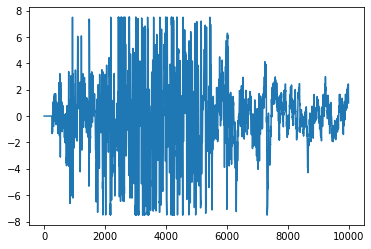

In [6]:
# Plotting first 10000 data
plt.plot(C3[:10000])

# Analysis for first 10000 points of dataset

In [ ]:
# Finding time delay (tau)
x = C3[:10000]
r = delay.acorr(x, maxtau=50)
tau = np.argmax(r < 1.0 / np.e)
tau

10

In [ ]:
??dimension._fnn

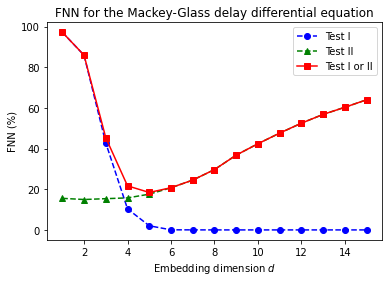

In [ ]:
dim = np.arange(1, 15 + 1)
f1, f2, f3 = dimension.fnn(x, tau=50, dim=dim, maxnum = 1000, window=100, metric='euclidean')

plt.title(r'FNN for the Mackey-Glass delay differential equation')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I or II')
plt.legend()

plt.show()

In [ ]:
# Embedding the data
x = C3[:10000]
dim = [6]
tau = tau
data1 = np.asarray([utils.reconstruct(x, dim=d, tau=tau) for d in dim], dtype = float)
data1 = np.squeeze(data1)
data1

array([[2.02929192e-04, 2.02929192e-04, 2.02929192e-04, 2.02929192e-04,
        2.02929192e-04, 2.02929192e-04],
       [2.02929192e-04, 2.02929192e-04, 2.02929192e-04, 2.02929192e-04,
        2.02929192e-04, 2.02929192e-04],
       [2.02929192e-04, 2.02929192e-04, 2.02929192e-04, 2.02929192e-04,
        2.02929192e-04, 2.02929192e-04],
       ...,
       [1.01270717e+00, 1.42520890e+00, 2.12833684e+00, 2.18458708e+00,
        2.10958676e+00, 1.24708315e+00],
       [1.19083292e+00, 1.35958362e+00, 2.17521204e+00, 2.04396149e+00,
        2.01583637e+00, 1.05020733e+00],
       [1.41583386e+00, 1.33145850e+00, 2.07208661e+00, 1.89396086e+00,
        2.02521141e+00, 9.93957091e-01]])

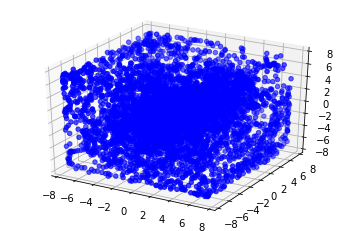

In [ ]:
# Plot the first three states
x1 = data1[:,0]
x2 = data1[:,1]
x3 = data1[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,x2,x3, zdir='z',  c='b', marker='o')

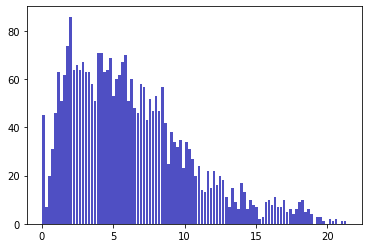

In [ ]:
# Find the nearest neighbor of all points in the dataset
tree = KDTree(data1)
j = 1 # index of the point whose nearest neighbor is taken into study
for i in range(2, 23):
  dist, index = tree.query(data1[j], k = i, p =2) # p=2 for euclidean distance

# So point with index 1 and 4477 can be taken as the two point in closest trajectories 
#(Considering the Theiler wondow; as 4477 is greater than the theiler window)
# Finding the amplification upto next 1000 points in each
A = np.array([],dtype = float)
d0 = dist[1]
A = np.append(A,d0)
for i in range(1,3000):
  d1 = np.asarray(euclidean_distance(data1[j+i],data1[index[1]+i]), dtype = float)
  A = np.append(A,d1)

# Plotting the histogram
n, bins, patches = plt.hist(x=A, bins=100, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [ ]:
n, bins, min(A), max(A)

(array([45.,  7., 20., 31., 46., 63., 51., 62., 74., 86., 64., 66., 64.,
        67., 63., 63., 58., 51., 71., 71., 63., 64., 69., 53., 60., 62.,
        67., 70., 51., 60., 48., 46., 58., 57., 43., 52., 47., 53., 47.,
        57., 42., 25., 38., 34., 32., 35., 23., 34., 31., 27., 20., 24.,
        14., 13., 22., 15., 22., 16., 20., 18., 11.,  7., 15.,  9.,  6.,
        17., 13.,  6., 10.,  8.,  7.,  2.,  3.,  9., 10.,  8., 11.,  7.,
         7., 10.,  5.,  6.,  4.,  6.,  9., 10.,  5.,  6.,  4.,  0.,  3.,
         3.,  1.,  0.,  2.,  1.,  2.,  0.,  1.,  1.]),
 array([ 0.        ,  0.21346802,  0.42693604,  0.64040405,  0.85387207,
         1.06734009,  1.28080811,  1.49427612,  1.70774414,  1.92121216,
         2.13468018,  2.34814819,  2.56161621,  2.77508423,  2.98855225,
         3.20202027,  3.41548828,  3.6289563 ,  3.84242432,  4.05589234,
         4.26936035,  4.48282837,  4.69629639,  4.90976441,  5.12323243,
         5.33670044,  5.55016846,  5.76363648,  5.9771045 ,  6.190572

In [ ]:
area = sum(np.diff(bins)*n)
area

640.4040531560825

In [ ]:
# Chaotic 3d henon - Finding the lyapunov exponent
le = lyapunov.mle(data1, maxnum = 1000) # Average divergence
le_real = best_fit_slope(np.arange(500)/500,le/max(le)) # Lyapunov exponent
le_real

0.2229687379669604

# Finding the Area Series and Plotting it (Window Size = 10000)



In [ ]:
area = np.array([], dtype = float)
for i in range(int(len(C3)/9000)-1):
  #print(i)
  x = C3[i*9000:i*9000+10000]
  x1 = C3[i*9000:i*9000+20000]
  #print(x)
  ar = np.asarray([find_area(x,x1)],dtype=float)
  area = np.append(area,ar)

area

array([640.40405316,  42.55118871, 359.07155388, 387.03317942,
        24.93867623,  21.37691575,  28.25262232,  34.26779013,
       194.61404465, 183.98058472, 187.93777998,  23.80292999,
        79.62280747,  23.56687907,  22.00389926, 188.17606212,
       176.89536263,  25.92663632, 216.82750882, 231.55332183,
       114.10302139,  20.07957714,  95.61385283, 171.9504825 ,
        29.54460571, 130.94208493,  44.24623777,  44.82866725,
       307.08768176,  41.54676592, 376.25388435, 199.2150938 ,
        27.10862839, 219.17385432,  26.42346756,  29.58434004,
       108.98078919,  60.72126278,  42.09432416,  33.38695286,
        49.19024042, 258.64848728,  57.30057176, 109.72597914,
        25.9878434 , 204.52018829, 188.15027737,  28.95733692,
       168.20422073,  15.90963434,  15.97058963,  17.79337716,
        15.69074544,  16.6266003 , 169.06515004,  17.75548381,
       177.17427813,  17.4478541 ,  18.70269009,  18.06443763,
        17.88357734, 157.11529601,  20.44711878,  16.62

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Area under the histogram')

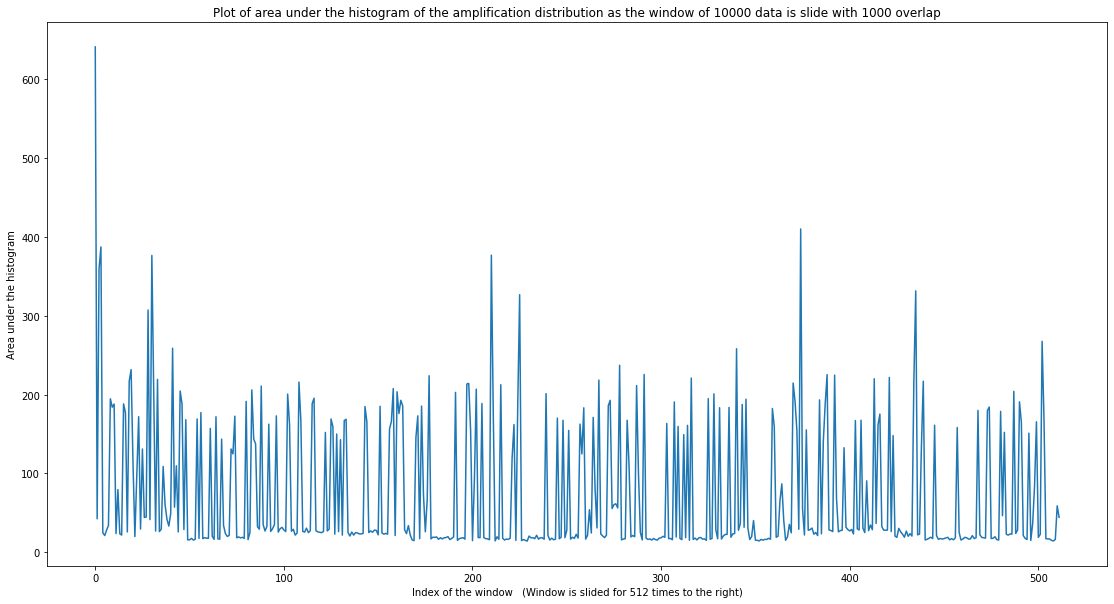

In [ ]:
plt.figure(figsize=(19,10))
plt.plot(area)
plt.title('Plot of area under the histogram of the amplification distribution as the window of 10000 data is slide with 1000 overlap')
plt.xlabel('Index of the window   (Window is slided for 512 times to the right)')
plt.ylabel('Area under the histogram')

# Finding the Area Series and Plotting it (Window Size = 20000)

In [ ]:
area = np.array([], dtype = float)
for i in range(int(len(C3)/18000)-1):
  #print(i)
  x = C3[i*18000:i*18000+20000]
  x1 = C3[i*18000:i*18000+40000]
  #print(x)
  ar = np.asarray([find_area(x,x1)],dtype=float)
  area = np.append(area,ar)

area

array([563.29274918, 328.99041359,  24.93867623,  28.25262232,
       203.5282514 , 187.93777998,  79.62280747,  22.00389926,
       189.29358435, 216.82750882, 114.10302139,  95.61385283,
        29.54460571,  44.24623777, 307.08768176, 376.25388435,
        27.10862839,  26.42346756, 108.98078919,  42.09432416,
        49.19024042,  57.30057176, 194.82618971, 270.50518559,
       168.20422073,  15.97058963,  15.69074544, 169.06515004,
       177.17427813, 155.63180072,  17.88357734, 218.45444683,
       171.88238816,  16.75477136,  34.22928541,  20.25971444,
       123.74697361, 172.58959436,  19.60868121,  19.15519113,
       191.37150491,  25.21661516, 143.58950129, 153.99499634,
       210.70324451,  27.10309392, 179.51517568,  30.01921339,
       172.94476053,  30.03201657,  28.41326155, 200.63632046,
        26.8241259 ,  21.93194737, 215.73273005,  26.58624569,
        30.73659979, 164.06706212, 195.3807711 ,  26.05033154,
        25.04680353, 151.98874653,  29.55391832, 236.70

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Area under the histogram')

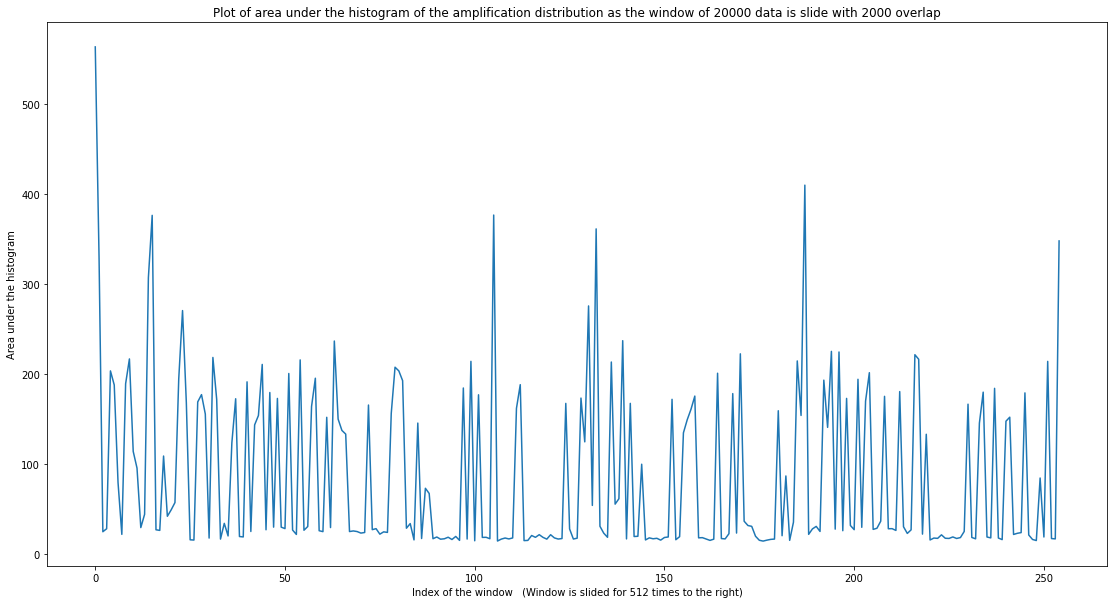

In [ ]:
plt.figure(figsize=(19,10))
plt.plot(area)
plt.title('Plot of area under the histogram of the amplification distribution as the window of 20000 data is slide with 2000 overlap')
plt.xlabel('Index of the window   (Window is slided for 512 times to the right)')
plt.ylabel('Area under the histogram')

# Finding the Area Series and Plotting it (Window Size = 30000)

In [ ]:
area = np.array([], dtype = float)
for i in range(int(len(C3)/27000)-1):
  #print(i)
  x = C3[i*27000:i*27000+30000]
  x1 = C3[i*27000:i*27000+60000]
  #print(x)
  ar = np.asarray([find_area(x,x1)],dtype=float)
  area = np.append(area,ar)

area

array([546.22794773, 488.88150592,  28.25262232, 183.98058472,
        79.62280747, 288.34231342, 216.82750882,  20.07957714,
       246.29985991,  44.82866725, 376.25388435, 219.17385432,
       108.98078919,  33.38695286,  57.30057176, 155.84904306,
       177.64450733, 146.07716778, 203.22699979, 178.86968787,
       142.06907543, 145.50626786,  16.75477136,  23.86095973,
       123.74697361,  18.53360347,  19.15519113, 174.24130021,
       198.84477643, 167.00994546, 152.56343948,  26.62053793,
       172.94476053, 144.38876932, 164.70759415,  29.31765301,
       215.73273005,  25.74772975, 164.06706212,  27.5682967 ,
        25.04680353,  27.23253253, 236.70102912,  26.38025798,
       133.34773085,  20.80321004,  25.13421969,  23.42241577,
       193.89873524,  25.56173794,  22.24168312,  23.05230462,
       156.26002551,  21.42233997, 197.18281814,  23.79465498,
        15.87111813, 173.01633057,  73.1771254 , 193.46774082,
        19.07572162, 175.28569839,  18.82727757,  17.68

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Area under the histogram')

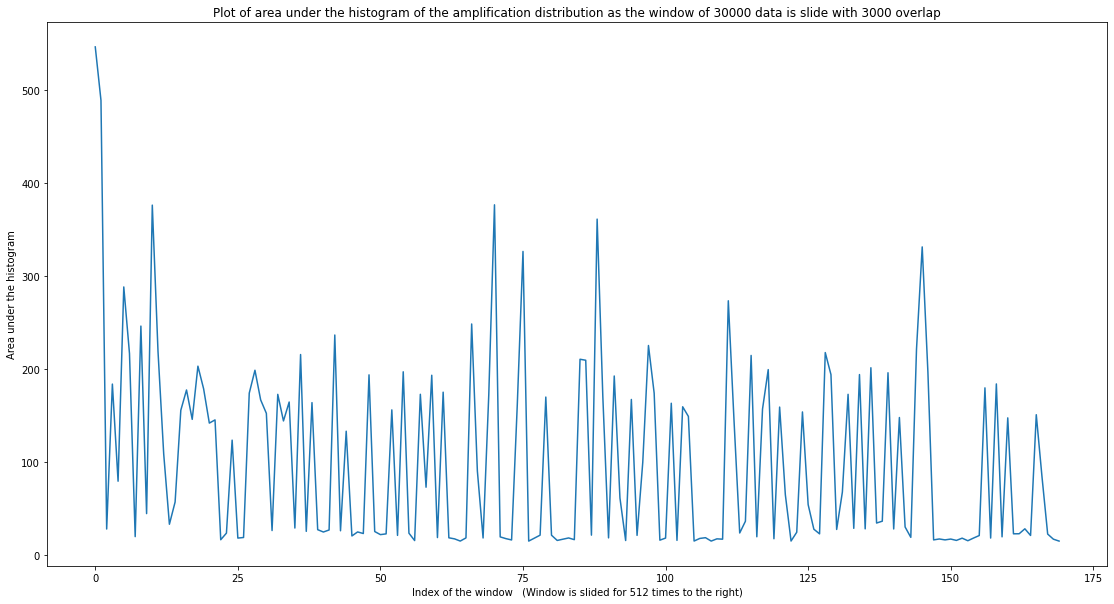

In [ ]:
plt.figure(figsize=(19,10))
plt.plot(area)
plt.title('Plot of area under the histogram of the amplification distribution as the window of 30000 data is slide with 3000 overlap')
plt.xlabel('Index of the window   (Window is slided for 512 times to the right)')
plt.ylabel('Area under the histogram')

# Finding the Area Series and Plotting it (Window Size = 40000)

In [ ]:
area = np.array([], dtype = float)
for i in range(int(len(C3)/36000)-1):
  #print(i)
  x = C3[i*36000:i*36000+40000]
  x1 = C3[i*36000:i*36000+80000]
  #print(x)
  ar = np.asarray([find_area(x,x1)],dtype=float)
  area = np.append(area,ar)

area

array([506.52400153,  24.93867623, 203.5282514 ,  79.62280747,
       189.29358435, 114.10302139, 246.29985991, 306.94430308,
        27.10862839, 108.98078919,  49.19024042, 194.82618971,
       177.64450733,  15.69074544, 177.17427813, 142.06907543,
       171.88238816, 165.91998633, 123.74697361, 201.29035392,
       138.83734989, 189.48954246, 210.70324451, 179.51517568,
       172.94476053,  28.41326155,  26.8241259 , 215.73273005,
        30.73659979, 195.3807711 ,  25.04680353,  29.55391832,
       150.00576537, 133.34773085,  25.81082989,  23.42739646,
       193.89873524,  28.32629364,  24.78506925, 156.26002551,
       195.95804096,  28.829255  ,  15.87111813,  17.40853125,
        67.40317014,  19.07572162, 139.95056489, 215.13066428,
        15.32248712,  16.79322503,  14.87763941,  18.6362957 ,
        17.16554073,  14.59586687,  17.94807815,  18.03066298,
       188.22591548,  15.29697373,  18.71726069, 160.57058291,
        21.60951846,  16.81609311, 167.44158185,  16.83

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Area under the histogram')

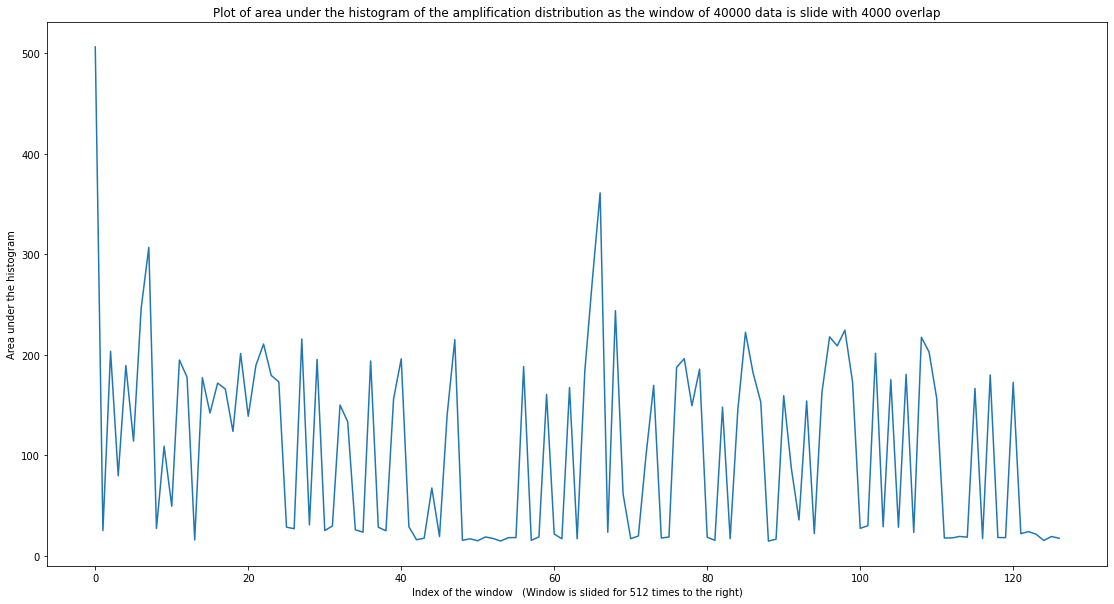

In [ ]:
plt.figure(figsize=(19,10))
plt.plot(area)
plt.title('Plot of area under the histogram of the amplification distribution as the window of 40000 data is slide with 4000 overlap')
plt.xlabel('Index of the window   (Window is slided for 512 times to the right)')
plt.ylabel('Area under the histogram')

# Finding the Area Series and Plotting it (Window Size = 50000)


Text(0, 0.5, 'Area under the histogram')

<Figure size 432x288 with 0 Axes>

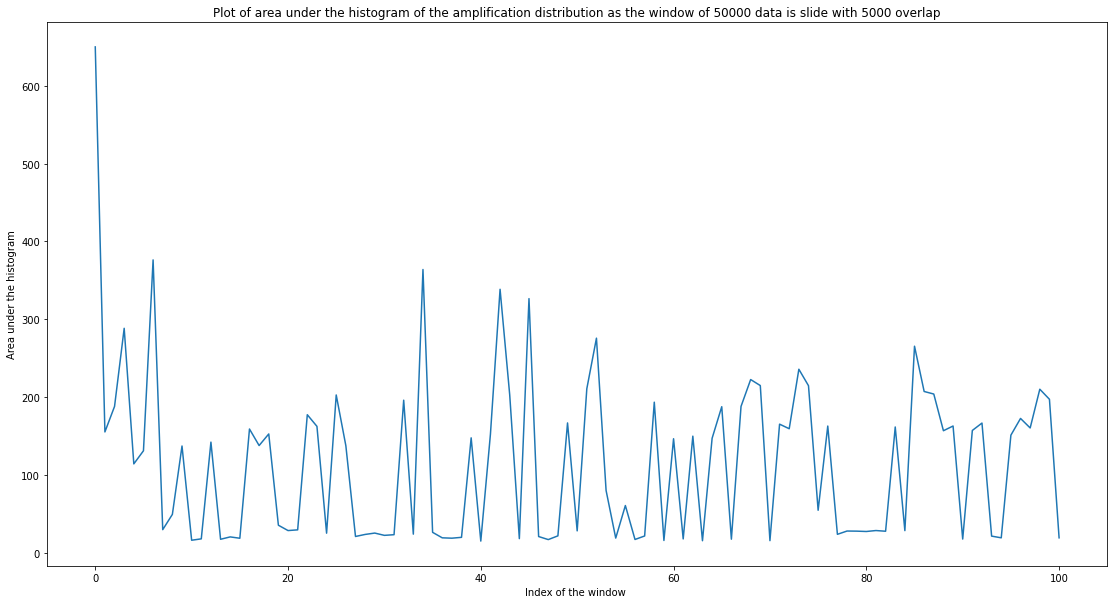

In [8]:
area = np.array([], dtype = float)
for i in range(int(len(C3)/45000)-1):
  #print(i)
  x = C3[i*45000:i*45000+50000]
  x1 = C3[i*45000:i*45000+100000]
  #print(x)
  ar = np.asarray([find_area(x,x1)],dtype=float)
  area = np.append(area,ar)

plt.figure(figsize=(19,10))
plt.plot(area)
plt.title('Plot of area under the histogram of the amplification distribution as the window of 50000 data is slide with 5000 overlap')
plt.xlabel('Index of the window ')
plt.ylabel('Area under the histogram')

# Finding the Area Series and Plotting it (Window Size = 60000)

Text(0, 0.5, 'Area under the histogram')

<Figure size 432x288 with 0 Axes>

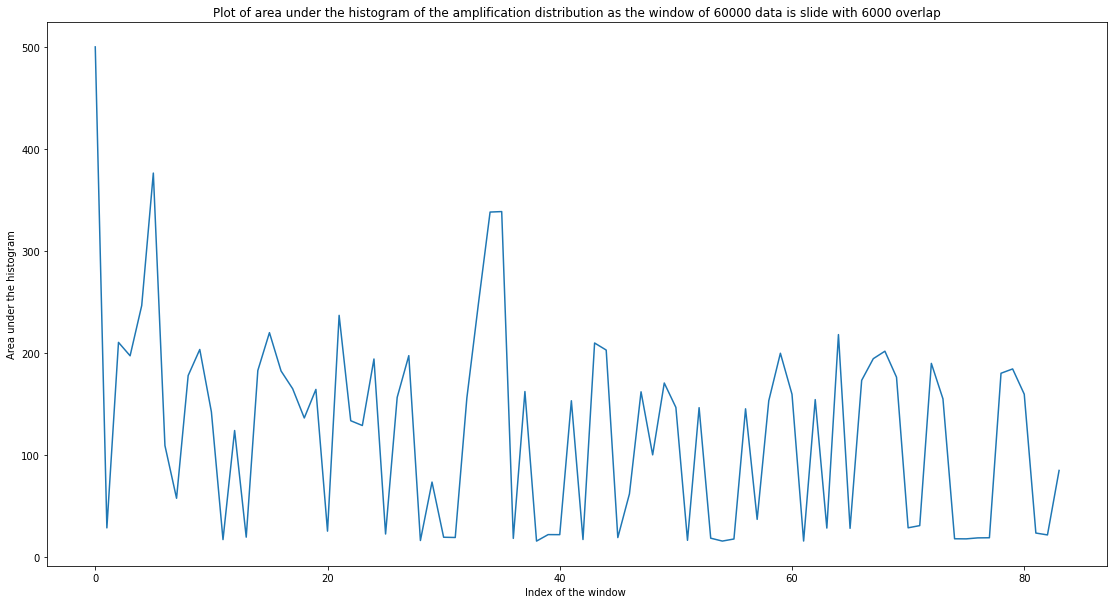

In [9]:
area = np.array([], dtype = float)
for i in range(int(len(C3)/54000)-1):
  #print(i)
  x = C3[i*54000:i*54000+60000]
  x1 = C3[i*54000:i*54000+120000]
  #print(x)
  ar = np.asarray([find_area(x,x1)],dtype=float)
  area = np.append(area,ar)

plt.figure(figsize=(19,10))
plt.plot(area)
plt.title('Plot of area under the histogram of the amplification distribution as the window of 60000 data is slide with 6000 overlap')
plt.xlabel('Index of the window ')
plt.ylabel('Area under the histogram')

# Finding the Area Series and Plotting it (Window Size = 70000)

Text(0, 0.5, 'Area under the histogram')

<Figure size 432x288 with 0 Axes>

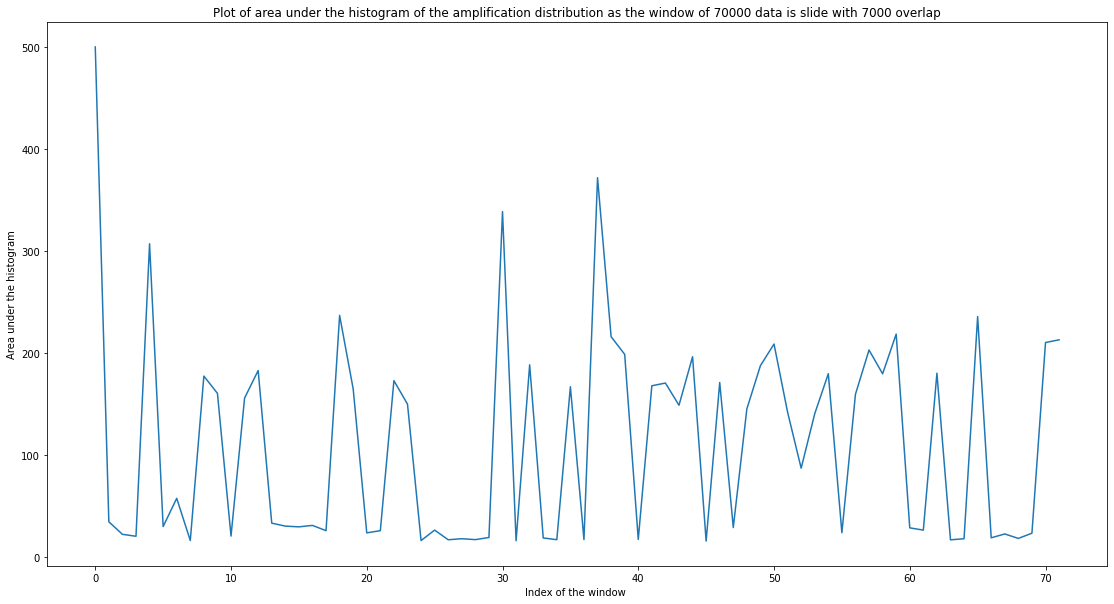

In [10]:
area = np.array([], dtype = float)
for i in range(int(len(C3)/63000)-1):
  #print(i)
  x = C3[i*63000:i*63000+70000]
  x1 = C3[i*63000:i*63000+140000]
  #print(x)
  ar = np.asarray([find_area(x,x1)],dtype=float)
  area = np.append(area,ar)

plt.figure(figsize=(19,10))
plt.plot(area)
plt.title('Plot of area under the histogram of the amplification distribution as the window of 70000 data is slide with 7000 overlap')
plt.xlabel('Index of the window ')
plt.ylabel('Area under the histogram')

# Finding the Area Series and Plotting it (Window Size = 80000)

Text(0, 0.5, 'Area under the histogram')

<Figure size 432x288 with 0 Axes>

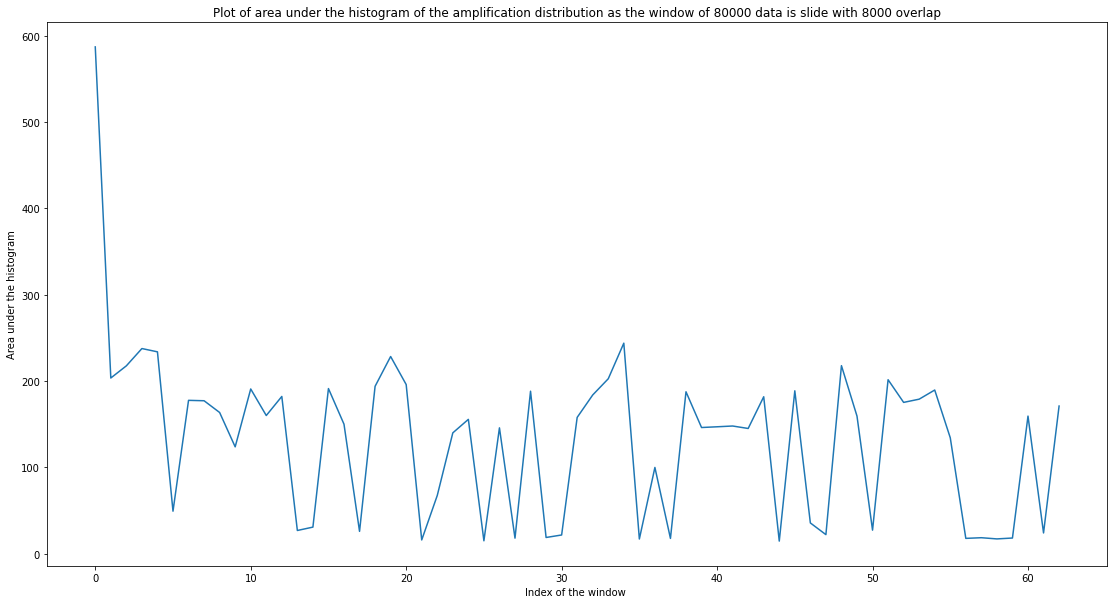

In [11]:
area = np.array([], dtype = float)
for i in range(int(len(C3)/72000)-1):
  #print(i)
  x = C3[i*72000:i*72000+80000]
  x1 = C3[i*72000:i*72000+160000]
  #print(x)
  ar = np.asarray([find_area(x,x1)],dtype=float)
  area = np.append(area,ar)

plt.figure(figsize=(19,10))
plt.plot(area)
plt.title('Plot of area under the histogram of the amplification distribution as the window of 80000 data is slide with 8000 overlap')
plt.xlabel('Index of the window ')
plt.ylabel('Area under the histogram')

# Finding the Area Series and Plotting it (Window Size = 90000)

Text(0, 0.5, 'Area under the histogram')

<Figure size 432x288 with 0 Axes>

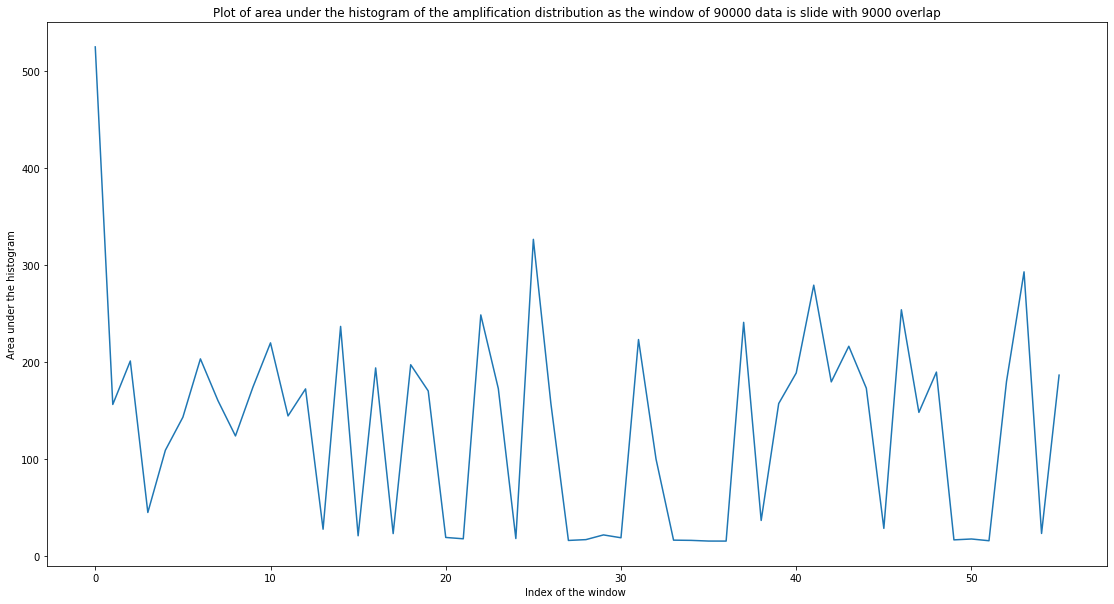

In [13]:
area = np.array([], dtype = float)
for i in range(int(len(C3)/81000)-1):
  #print(i)
  x = C3[i*81000:i*81000+90000]
  x1 = C3[i*81000:i*81000+180000]
  #print(x)
  ar = np.asarray([find_area(x,x1)],dtype=float)
  area = np.append(area,ar)

plt.figure(figsize=(19,10))
plt.plot(area)
plt.title('Plot of area under the histogram of the amplification distribution as the window of 90000 data is slide with 9000 overlap')
plt.xlabel('Index of the window ')
plt.ylabel('Area under the histogram')

# Finding the Area Series and Plotting it (Window Size = 100000)

Text(0, 0.5, 'Area under the histogram')

<Figure size 432x288 with 0 Axes>

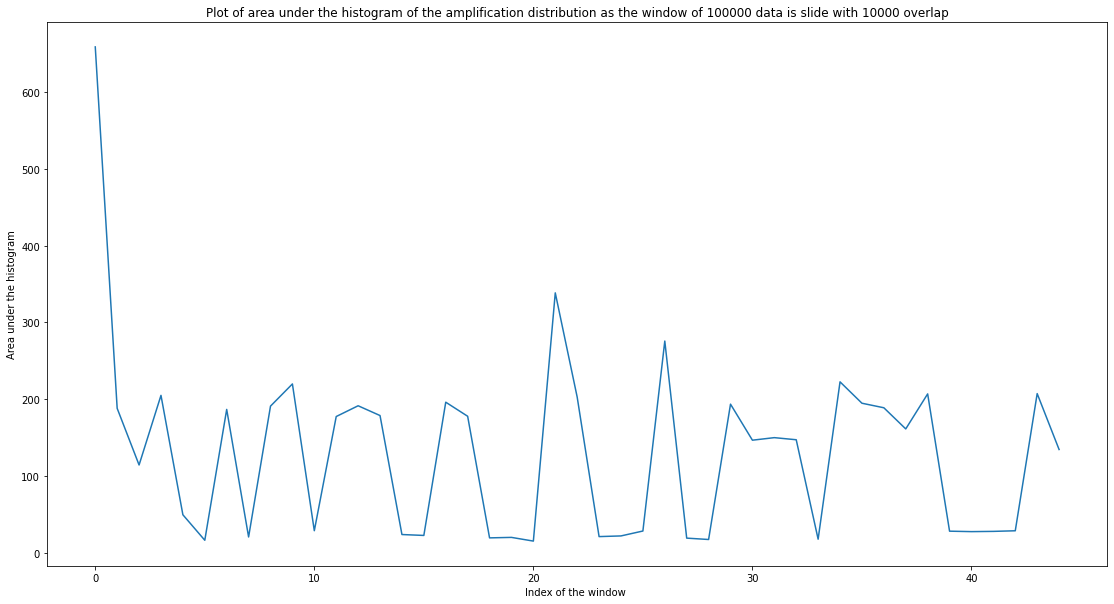

In [14]:
area = np.array([], dtype = float)
for i in range(int(len(C3)/100000)-1):
  #print(i)
  x = C3[i*90000:i*90000+100000]
  x1 = C3[i*90000:i*90000+200000]
  #print(x)
  ar = np.asarray([find_area(x,x1)],dtype=float)
  area = np.append(area,ar)

plt.figure(figsize=(19,10))
plt.plot(area)
plt.title('Plot of area under the histogram of the amplification distribution as the window of 100000 data is slide with 10000 overlap')
plt.xlabel('Index of the window ')
plt.ylabel('Area under the histogram')

# Finding the Largest Lyapunov Series and Plotting it

In [ ]:
L_le = np.array([], dtype = float)
for i in range(int(len(C3)/9000)-1):
  print(i)
  x = C3[i*9000:i*9000+10000]
  le = np.asarray([find_lle(x)],dtype=float)
  L_le = np.append(L_le,le)

L_le

# Taking too much time

In [ ]:
# Saving the values
#savetxt('L_le.csv', L_le, delimiter=',')
np.savetxt('C3_06.08.2019_area.csv', area, delimiter=',')